# Comparison of the results

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [186]:
fst = 'aqua'
snd = 'aquamarine'
trd = 'darksalmon'

## Loading the files

In [187]:
nn_reviews_baseline = pd.read_csv('results/baselines/nn_reviews_baseline.csv')
nn_news_baseline = pd.read_csv('results/baselines/nn_news_baseline.csv')
svm_reviews_baseline = pd.read_csv('results/baselines/svm_reviews_baseline.csv')
svm_news_baseline = pd.read_csv('results/baselines/svm_news_baseline.csv')
nn_reviews_augmented_baseline = pd.read_csv('results/baselines/nn_reviews_augmented_baseline.csv')
svm_reviews_augmented_baseline = pd.read_csv('results/baselines/svm_reviews_augmented_baseline.csv')

lstm_reviews_base_model = pd.read_csv('results/lstm/reviews/base_model.csv')
lstm_reviews_base_model_dropout = pd.read_csv('results/lstm/reviews/base_model_dropout.csv')
lstm_reviews_bigger_parameters = pd.read_csv('results/lstm/reviews/bigger_parameters.csv')
lstm_reviews_best_parameters = pd.read_csv('results/lstm/reviews/best_parameters.csv')
lstm_reviews_augmented_best_parameters = pd.read_csv('results/lstm/reviews/augmented_best_parameters.csv')

lstm_news_base_model = pd.read_csv('results/lstm/news/base_model.csv')
lstm_news_best_parameters = pd.read_csv('results/lstm/news/best_parameters.csv')
lstm_news_bigger_parameters = pd.read_csv('results/lstm/news/bigger_parameters.csv')

bert_reviews = pd.read_csv('results/bert/reviews_results.csv')
bert_news = pd.read_csv('results/bert/news_results.csv')

In [188]:
bert_news

,Unnamed: 0,1,2,3,4,accuracy,macro avg,weighted avg,train_time,test_time
0,precision,0.914761,0.978307,0.909859,0.867727,0.916974,0.917664,0.917664,4075,169
1,recall,0.926316,0.973158,0.850000,0.918421,0.916974,0.916974,0.916974,4075,169
2,f1-score,0.920502,0.975726,0.878912,0.892355,0.916974,0.916874,0.916874,4075,169
3,support,1900.000000,1900.000000,1900.000000,1900.000000,0.916974,7600.000000,7600.000000,4075,169


In [189]:
plt.style.use('seaborn-v0_8-pastel')

In [190]:
nn_reviews_baseline.rename(columns={"Unnamed: 0": "Metric"}, inplace=True)
svm_reviews_baseline.rename(columns={"Unnamed: 0": "Metric"}, inplace=True)

nn_news_baseline.rename(columns={"Unnamed: 0": "Metric", "1": "World", "2": "Sports", "3": "Business", "4": "Sci/Tech"},
                        inplace=True)
svm_news_baseline.rename(
    columns={"Unnamed: 0": "Metric", "1": "World", "2": "Sports", "3": "Business", "4": "Sci/Tech"}, inplace=True)

nn_reviews_augmented_baseline.rename(columns={"Unnamed: 0": "Metric"}, inplace=True)
svm_reviews_augmented_baseline.rename(columns={"Unnamed: 0": "Metric"}, inplace=True)

lstm_reviews_best_parameters.rename(columns={"Unnamed: 0": "Metric", "0": "negative", "1": "neutral", "2":"positive"}, inplace=True)
lstm_reviews_bigger_parameters.rename(columns={"Unnamed: 0": "Metric", "0": "negative", "1": "neutral", "2":"positive"}, inplace=True)
lstm_reviews_base_model.rename(columns={"Unnamed: 0": "Metric", "0": "negative", "1": "neutral", "2":"positive"}, inplace=True)
lstm_reviews_augmented_best_parameters.rename(columns={"Unnamed: 0": "Metric", "0": "negative", "1": "neutral", "2":"positive"}, inplace=True)
lstm_reviews_base_model_dropout.rename(columns={"Unnamed: 0": "Metric", "0": "negative", "1": "neutral", "2":"positive"}, inplace=True)

lstm_news_base_model.rename(
    columns={"Unnamed: 0": "Metric", "0": "World", "1": "Sports", "2": "Business", "3": "Sci/Tech"}, inplace=True)
lstm_news_best_parameters.rename(
    columns={"Unnamed: 0": "Metric", "0": "World", "1": "Sports", "2": "Business", "3": "Sci/Tech"}, inplace=True)
lstm_news_bigger_parameters.rename(
    columns={"Unnamed: 0": "Metric", "0": "World", "1": "Sports", "2": "Business", "3": "Sci/Tech"}, inplace=True)

bert_reviews.rename(columns={"Unnamed: 0": "Metric", "0": "negative", "1": "neutral", "2":"positive"}, inplace=True)
bert_news.rename(
    columns={"Unnamed: 0": "Metric", "1": "World", "2": "Sports", "3": "Business", "4": "Sci/Tech"}, inplace=True)

In [191]:
nn_reviews_baseline.set_index('Metric', inplace=True)
svm_reviews_baseline.set_index('Metric', inplace=True)
nn_news_baseline.set_index('Metric', inplace=True)
svm_news_baseline.set_index('Metric', inplace=True)

nn_reviews_augmented_baseline.set_index('Metric', inplace=True)
svm_reviews_augmented_baseline.set_index('Metric', inplace=True)

lstm_reviews_base_model_dropout.set_index('Metric', inplace=True)
lstm_reviews_best_parameters.set_index('Metric', inplace=True)
lstm_reviews_base_model.set_index('Metric', inplace=True)
lstm_reviews_bigger_parameters.set_index('Metric', inplace=True)
lstm_reviews_augmented_best_parameters.set_index('Metric', inplace=True)

lstm_news_base_model.set_index('Metric', inplace=True)
lstm_news_bigger_parameters.set_index('Metric', inplace=True)
lstm_news_best_parameters.set_index('Metric', inplace=True)

bert_reviews.set_index('Metric', inplace=True)
bert_news.set_index('Metric', inplace=True)

### Creating Runtime Dataframe

In [192]:
runtimes = pd.DataFrame.from_dict({
    "train": [nn_reviews_baseline.train_time[0],
              svm_reviews_baseline.train_time[0],
              nn_reviews_augmented_baseline.train_time[0],
              svm_reviews_augmented_baseline.train_time[0],
              nn_news_baseline.train_time[0],
              svm_news_baseline.train_time[0],
              lstm_reviews_base_model_dropout.train_time[0],
              lstm_reviews_best_parameters.train_time[0],
              lstm_reviews_base_model.train_time[0],
              lstm_reviews_bigger_parameters.train_time[0],
              lstm_reviews_augmented_best_parameters.train_time[0],
              lstm_news_base_model.train_time[0],
              lstm_news_bigger_parameters.train_time[0],
              lstm_news_best_parameters.train_time[0],
              bert_reviews.train_time[0],
              bert_news.train_time[0]],
    "test": [nn_reviews_baseline.test_time[0],
             svm_reviews_baseline.test_time[0],
             nn_reviews_augmented_baseline.test_time[0],
             svm_reviews_augmented_baseline.test_time[0],
             nn_news_baseline.test_time[0],
             svm_news_baseline.test_time[0],
             lstm_reviews_base_model_dropout.test_time[0],
             lstm_reviews_best_parameters.test_time[0],
             lstm_reviews_base_model.test_time[0],
             lstm_reviews_bigger_parameters.test_time[0],
             lstm_reviews_augmented_best_parameters.test_time[0],
             lstm_news_base_model.test_time[0],
             lstm_news_bigger_parameters.test_time[0],
             lstm_news_best_parameters.test_time[0],
             bert_reviews.test_time[0],
             bert_news.test_time[0]]
}
)
runtimes.index = ["nn_reviews", "svm_reviews", "nn_reviews_augmented",
                  "svm_reviews_augmented", "nn_news", "svm_news",
                  "lstm_reviews_base_model_dropout", "lstm_reviews_best_parameters",
                  "lstm_reviews_base_model", "lstm_reviews_bigger_parameters",
                  "lstm_reviews_augmented_best_parameters", "lstm_news_base_model",
                  "lstm_news_bigger_parameters", "lstm_news_best_parameters",
                  "bert_reviews", "bert_news"]

feature_extraction_times = pd.DataFrame.from_dict(
    {"feature_extraction": [nn_reviews_baseline.feature_extraction_time[0],
                            nn_reviews_baseline.feature_extraction_time[0],
                            nn_reviews_augmented_baseline.feature_extraction_time[0],
                            nn_reviews_augmented_baseline.feature_extraction_time[0],
                            nn_news_baseline.feature_extraction_time[0],
                            nn_news_baseline.feature_extraction_time[0]]})
feature_extraction_times.index = ["nn_reviews", "svm_reviews", "nn_reviews_augmented",
                                  "svm_reviews_augmented", "nn_news", "svm_news"]

## Combining non-class metrics into one DF

In [193]:
overall_metrics = pd.DataFrame.from_dict({
    "accuracy": [nn_reviews_baseline.accuracy[0],
                 svm_reviews_baseline.accuracy[0],
                 nn_reviews_augmented_baseline.accuracy[0],
                 svm_reviews_augmented_baseline.accuracy[0],
                 nn_news_baseline.accuracy[0],
                 svm_news_baseline.accuracy[0],
                 lstm_reviews_base_model_dropout.accuracy[0],
                 lstm_reviews_best_parameters.accuracy[0],
                 lstm_reviews_base_model.accuracy[0],
                 lstm_reviews_bigger_parameters.accuracy[0],
                 lstm_reviews_augmented_best_parameters.accuracy[0],
                 lstm_news_base_model.accuracy[0],
                 lstm_news_bigger_parameters.accuracy[0],
                 lstm_news_best_parameters.accuracy[0],
                 bert_reviews.accuracy[0],
                 bert_news.accuracy[0]],
    "macro avg": [nn_reviews_baseline['macro avg'][0],
                  svm_reviews_baseline['macro avg'][0],
                  nn_reviews_augmented_baseline['macro avg'][0],
                  svm_reviews_augmented_baseline['macro avg'][0],
                  nn_news_baseline['macro avg'][0],
                  svm_news_baseline['macro avg'][0],
                  lstm_reviews_base_model_dropout['macro avg'][0],
                  lstm_reviews_best_parameters['macro avg'][0],
                  lstm_reviews_base_model['macro avg'][0],
                  lstm_reviews_bigger_parameters['macro avg'][0],
                  lstm_reviews_augmented_best_parameters['macro avg'][0],
                  lstm_news_base_model['macro avg'][0],
                  lstm_news_bigger_parameters['macro avg'][0],
                  lstm_news_best_parameters['macro avg'][0],
                  bert_reviews['macro avg'][0],
                  bert_news['macro avg'][0]],
    "weighted avg": [nn_reviews_baseline['weighted avg'][0],
                     svm_reviews_baseline['weighted avg'][0],
                     nn_reviews_augmented_baseline['weighted avg'][0],
                     svm_reviews_augmented_baseline['weighted avg'][0],
                     nn_news_baseline['weighted avg'][0],
                     svm_news_baseline['weighted avg'][0],
                     lstm_reviews_base_model_dropout['weighted avg'][0],
                     lstm_reviews_best_parameters['weighted avg'][0],
                     lstm_reviews_base_model['weighted avg'][0],
                     lstm_reviews_bigger_parameters['weighted avg'][0],
                     lstm_reviews_augmented_best_parameters['weighted avg'][0],
                     lstm_news_base_model['weighted avg'][0],
                     lstm_news_bigger_parameters['weighted avg'][0],
                     lstm_news_best_parameters['weighted avg'][0],
                     bert_reviews['weighted avg'][0],
                     bert_news['weighted avg'][0]]
})
overall_metrics.index = ["nn_reviews", "svm_reviews", "nn_reviews_augmented",
                  "svm_reviews_augmented", "nn_news", "svm_news",
                  "lstm_reviews_base_model_dropout", "lstm_reviews_best_parameters",
                  "lstm_reviews_base_model", "lstm_reviews_bigger_parameters",
                  "lstm_reviews_augmented_best_parameters", "lstm_news_base_model",
                  "lstm_news_bigger_parameters", "lstm_news_best_parameters",
                  "bert_reviews", "bert_news"]


In [194]:
overall_metrics_reviews = overall_metrics.loc[overall_metrics.index.str.contains('reviews')]
overall_metrics_news = overall_metrics.loc[overall_metrics.index.str.contains('news')]

Dropping time and overall columns from original datasets

In [195]:
nn_reviews_baseline.drop(columns=['train_time', 'test_time', 'feature_extraction_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
nn_news_baseline.drop(columns=['train_time', 'test_time', 'feature_extraction_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
nn_reviews_augmented_baseline.drop(columns=['train_time', 'test_time', 'feature_extraction_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)

svm_reviews_baseline.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
svm_news_baseline.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
svm_reviews_augmented_baseline.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)

lstm_reviews_base_model.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
lstm_reviews_best_parameters.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
lstm_reviews_base_model_dropout.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
lstm_reviews_bigger_parameters.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
lstm_reviews_augmented_best_parameters.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)

lstm_news_base_model.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
lstm_news_bigger_parameters.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
lstm_news_best_parameters.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)

bert_reviews.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
bert_news.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)

In [196]:
fst_patch = Patch(color=fst, label='Baseline')
snd_patch = Patch(color=snd, label='LSTM')
trd_patch = Patch(color=trd, label='BERT')

## Overall Metrics comparison (Accuracy micro, macro and weighted avg)

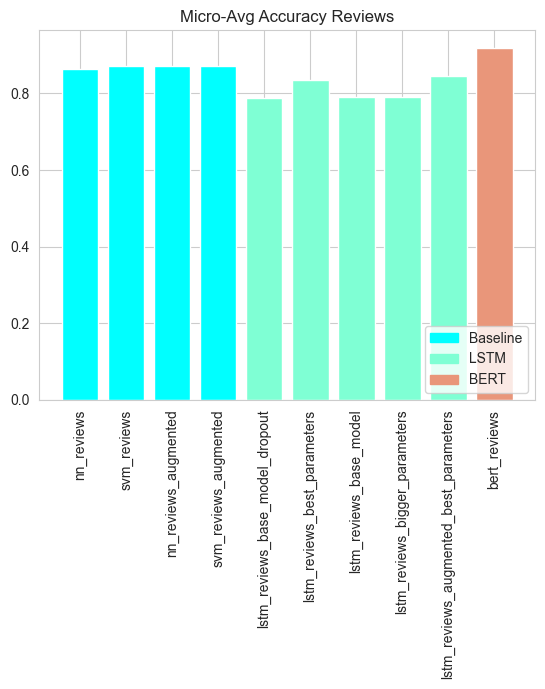

In [197]:
plt.bar(overall_metrics_reviews.index, overall_metrics_reviews.accuracy,
        color=[fst for x in range(4)]+ [snd for x in range(5)] + [trd])
plt.xticks(rotation=90)

plt.title('Micro-Avg Accuracy Reviews')
plt.legend(handles=[fst_patch,snd_patch,trd_patch], loc='lower right')
plt.show()

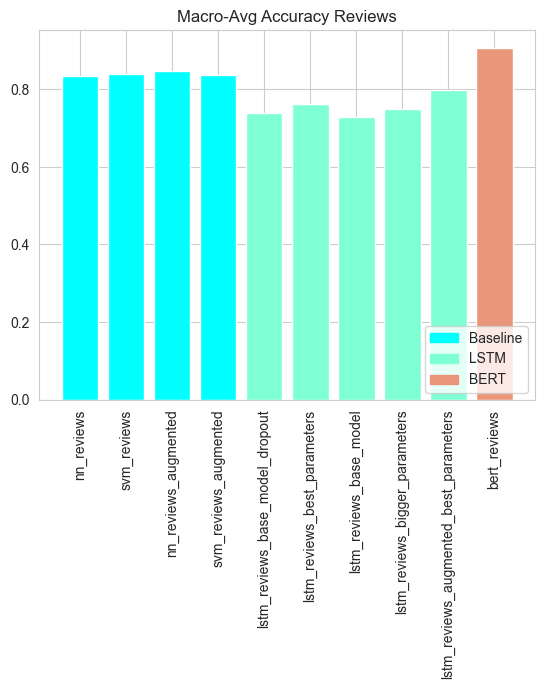

In [199]:
plt.bar(overall_metrics_reviews.index, overall_metrics_reviews['macro avg'],
        color=[fst for x in range(4)]+ [snd for x in range(5)] + [trd])
plt.xticks(rotation=90)

plt.title('Macro-Avg Accuracy Reviews')
plt.legend(handles=[fst_patch,snd_patch,trd_patch], loc='lower right')
plt.show()

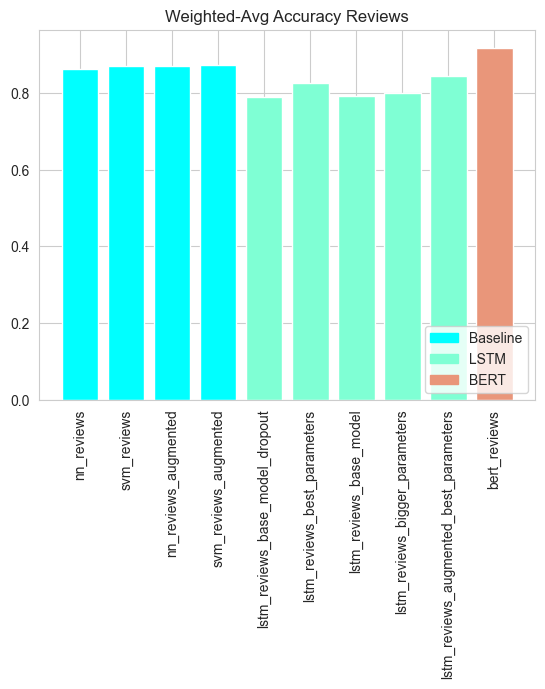

In [200]:
plt.bar(overall_metrics_reviews.index, overall_metrics_reviews['weighted avg'],
        color=[fst for x in range(4)]+ [snd for x in range(5)] + [trd])
plt.xticks(rotation=90)

plt.title('Weighted-Avg Accuracy Reviews')
plt.legend(handles=[fst_patch,snd_patch,trd_patch], loc='lower right')
plt.show()

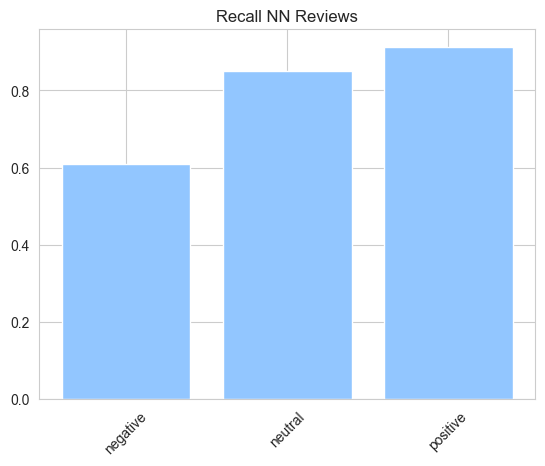

In [201]:
plt.bar(nn_reviews_baseline.columns, nn_reviews_baseline.loc['recall', :])
plt.xticks(rotation=45)
plt.title("Recall NN Reviews")
plt.show()

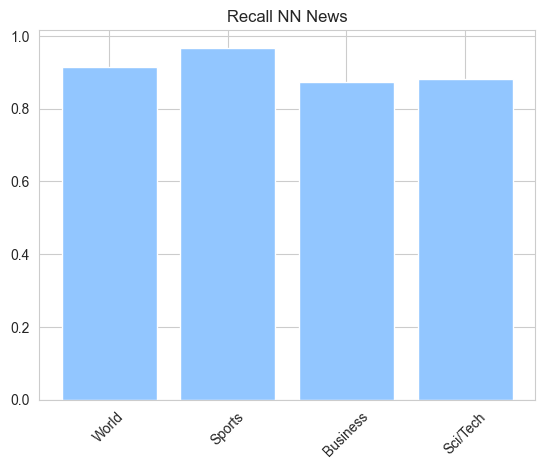

In [202]:
plt.bar(nn_news_baseline.columns, nn_news_baseline.loc['recall', :])
plt.xticks(rotation=45)
plt.title("Recall NN News")
plt.show()

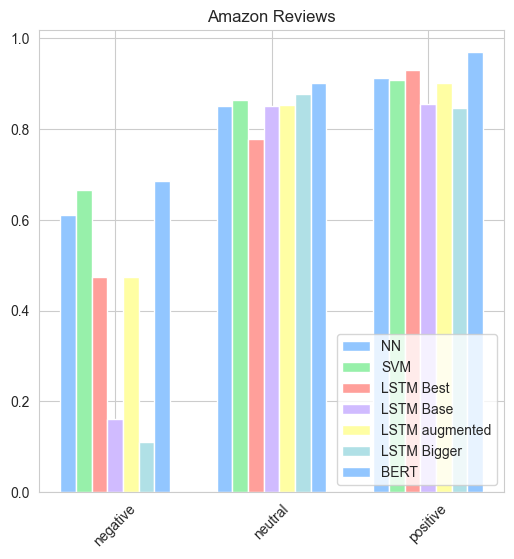

In [211]:
x = np.arange(nn_reviews_baseline.shape[1])
width = 0.1
plt.figure(figsize=(6,6))

# plot data in grouped manner of bar type
plt.bar(x - 3*width, nn_reviews_baseline.loc['recall', :], width)
plt.bar(x - 2*width, svm_reviews_baseline.loc['recall', :], width)
plt.bar(x -width, lstm_reviews_best_parameters.loc['recall', :], width)
plt.bar(x , lstm_reviews_base_model.loc['recall', :], width)
plt.bar(x + width, lstm_reviews_augmented_best_parameters.loc['recall', :], width)
plt.bar(x + 2*width, lstm_reviews_bigger_parameters.loc['recall', :], width)
plt.bar(x + 3*width, bert_reviews.loc['recall', :], width)

plt.xticks(x, nn_reviews_baseline.columns, rotation=45)
plt.title("Amazon Reviews Recall")
plt.legend(['NN', 'SVM', 'LSTM Best', 'LSTM Base', 'LSTM augmented', 'LSTM Bigger',  'BERT'],
           loc='lower right')
plt.show()

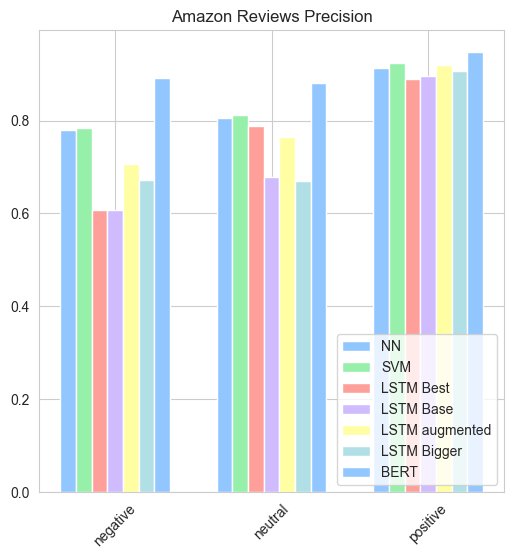

In [212]:
x = np.arange(nn_reviews_baseline.shape[1])
width = 0.1
plt.figure(figsize=(6,6))

# plot data in grouped manner of bar type
plt.bar(x - 3*width, nn_reviews_baseline.loc['precision', :], width)
plt.bar(x - 2*width, svm_reviews_baseline.loc['precision', :], width)
plt.bar(x -width, lstm_reviews_best_parameters.loc['precision', :], width)
plt.bar(x , lstm_reviews_base_model.loc['precision', :], width)
plt.bar(x + width, lstm_reviews_augmented_best_parameters.loc['precision', :], width)
plt.bar(x + 2*width, lstm_reviews_bigger_parameters.loc['precision', :], width)
plt.bar(x + 3*width, bert_reviews.loc['precision', :], width)

plt.xticks(x, nn_reviews_baseline.columns, rotation=45)
plt.title("Amazon Reviews Precision")
plt.legend(['NN', 'SVM', 'LSTM Best', 'LSTM Base', 'LSTM augmented', 'LSTM Bigger',  'BERT'],
           loc='lower right')
plt.show()

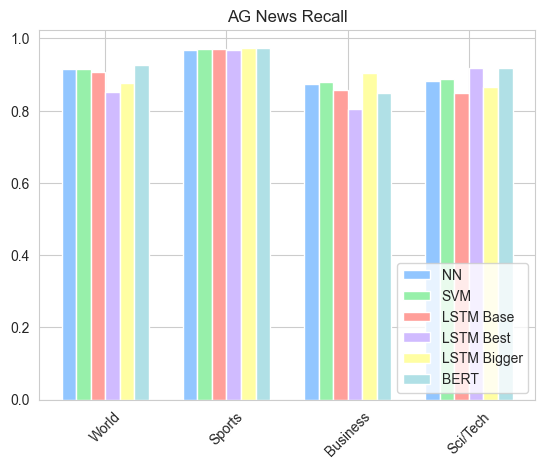

In [219]:
x = np.arange(nn_news_baseline.shape[1])
width = 0.12

# plot data in grouped manner of bar type
plt.bar(x - 2.5*width, nn_news_baseline.loc['recall', :], width)
plt.bar(x - 1.5*width, svm_news_baseline.loc['recall', :], width)
plt.bar(x - 0.5*width, lstm_news_base_model.loc['recall', :], width)
plt.bar(x + 0.5*width, lstm_news_best_parameters.loc['recall', :], width)
plt.bar(x + 1.5*width, lstm_news_bigger_parameters.loc['recall', :], width)
plt.bar(x + 2.5*width, bert_news.loc['recall', :], width)
plt.xticks(x, nn_news_baseline.columns, rotation=45)
plt.title("AG News Recall")
plt.legend(['NN', 'SVM', 'LSTM Base', 'LSTM Best', 'LSTM Bigger',  'BERT'],
           loc='lower right')
plt.show()

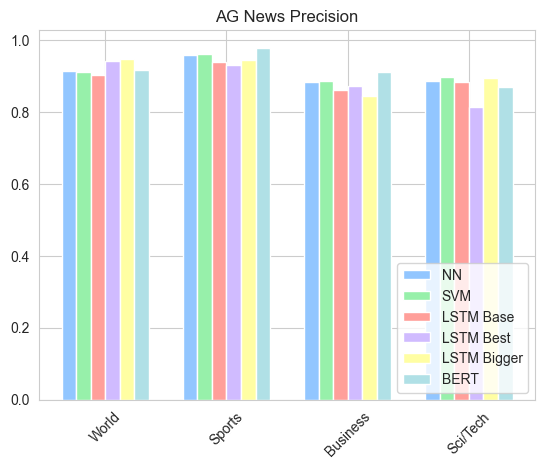

In [218]:
x = np.arange(nn_news_baseline.shape[1])
width = 0.12

# plot data in grouped manner of bar type
plt.bar(x - 2.5*width, nn_news_baseline.loc['precision', :], width)
plt.bar(x - 1.5*width, svm_news_baseline.loc['precision', :], width)
plt.bar(x - 0.5*width, lstm_news_base_model.loc['precision', :], width)
plt.bar(x + 0.5*width, lstm_news_best_parameters.loc['precision', :], width)
plt.bar(x + 1.5*width, lstm_news_bigger_parameters.loc['precision', :], width)
plt.bar(x + 2.5*width, bert_news.loc['precision', :], width)
plt.xticks(x, nn_news_baseline.columns, rotation=45)
plt.title("AG News Precision")
plt.legend(['NN', 'SVM', 'LSTM Base', 'LSTM Best', 'LSTM Bigger',  'BERT'],
           loc='lower right')
plt.show()

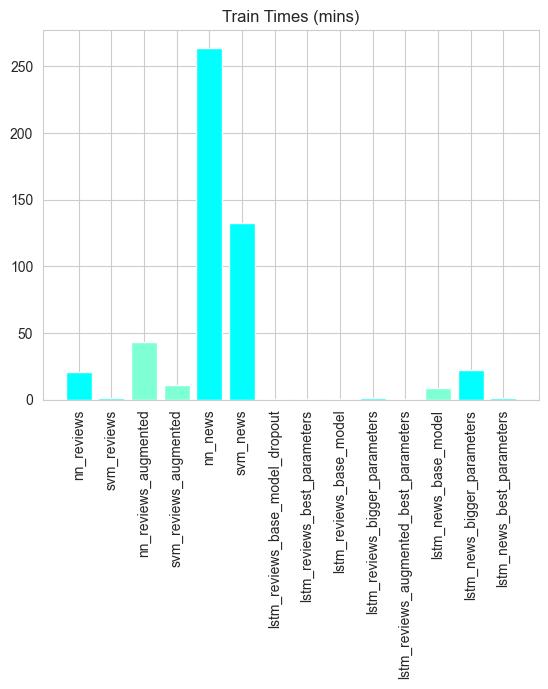

In [125]:

x = runtimes.index
# plot bars in stack manner
plt.bar(x, runtimes.train / 60, color=[fst, fst, snd, snd])
#plt.bar(x, runtimes.test, bottom=runtimes.train, color='b')
#plt.yscale("log")
plt.title("Train Times (mins)")
plt.xticks(rotation=90)
plt.show()

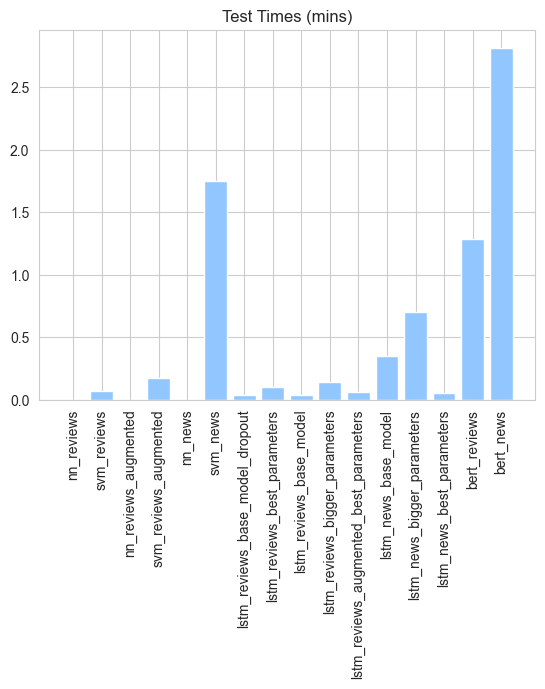

In [222]:
x = runtimes.index
plt.bar(x, runtimes.test / 60)
plt.title("Test Times (mins)")

plt.xticks(rotation=90)
plt.show()

In [127]:
feature_extraction_times

,feature_extraction
nn_reviews,3.092748
svm_reviews,3.092748
nn_reviews_augmented,2.075799
svm_reviews_augmented,2.075799
nn_news,24.561729
svm_news,24.561729


nn_reviews                3.092748
svm_reviews               3.092748
nn_reviews_augmented      2.075799
svm_reviews_augmented     2.075799
nn_news                  24.561729
svm_news                 24.561729
Name: feature_extraction, dtype: float64

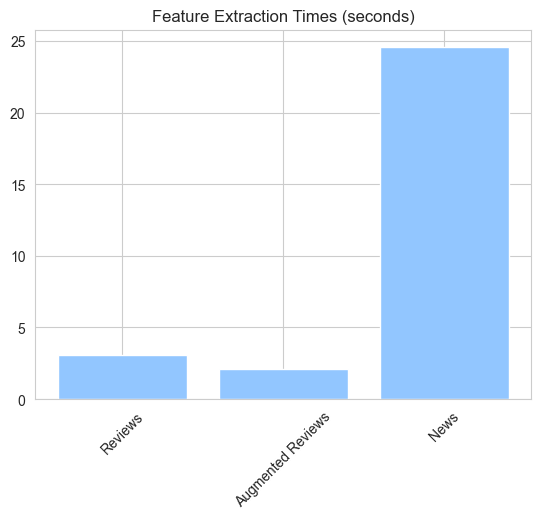

In [232]:
x = ['Reviews', 'Augmented Reviews', 'News']
plt.bar(x, feature_extraction_times.feature_extraction[['nn_reviews', 'nn_reviews_augmented', 'nn_news']])
plt.title("Feature Extraction Times (seconds)")
plt.xticks(rotation=45)
plt.show()

C:\Users\Radoslav Gajanin\AppData\Local\Temp\ipykernel_19508\4075063317.py:6: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 10 ** 3))


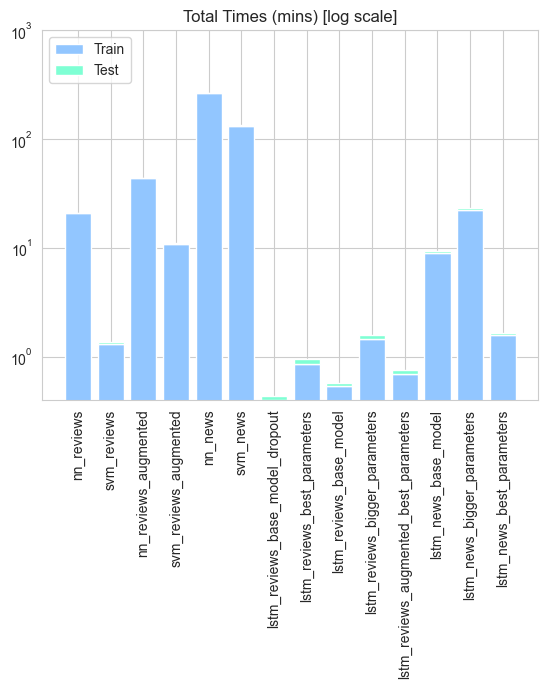

In [129]:
x = runtimes.index
# plot bars in stack manner
plt.bar(x, runtimes.train / 60)
plt.bar(x, runtimes.test / 60, bottom=runtimes.train / 60, color='aquamarine')
plt.yscale("log")
plt.ylim((0, 10 ** 3))
plt.xticks(rotation=90)
plt.title("Total Times (mins) [log scale]")
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## LSTM

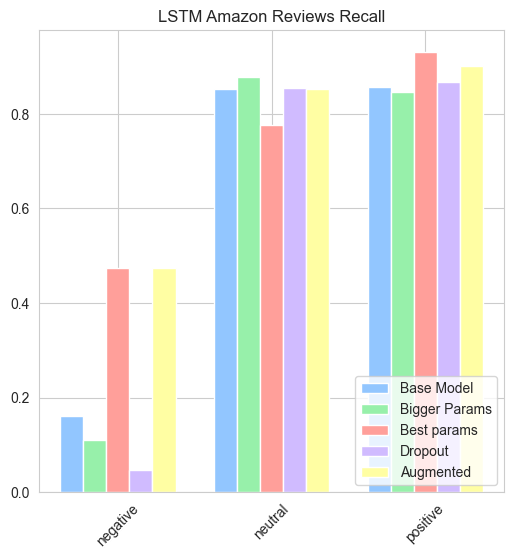

In [223]:
x = np.arange(lstm_reviews_base_model_dropout.shape[1])
width = 0.15
plt.figure(figsize=(6,6))

# plot data in grouped manner of bar type
plt.bar(x - 2*width, lstm_reviews_base_model.loc['recall', :], width)
plt.bar(x - width, lstm_reviews_bigger_parameters.loc['recall', :], width)
plt.bar(x , lstm_reviews_best_parameters.loc['recall', :], width)
plt.bar(x + width, lstm_reviews_base_model_dropout.loc['recall', :], width)
plt.bar(x + 2*width, lstm_reviews_augmented_best_parameters.loc['recall', :], width)

plt.xticks(x, lstm_reviews_base_model_dropout.columns, rotation=45)
plt.title("LSTM Amazon Reviews Recall")
plt.legend(['Base Model', 'Bigger Params', 'Best params', 'Dropout', 'Augmented'], loc='lower right')
plt.show()

In [224]:
lstm_news_base_model

,World,Sports,Business,Sci/Tech
Metric,,,,
precision,0.901254,0.937468,0.860847,0.882996
recall,0.907895,0.970526,0.856316,0.850000
f1-score,0.904562,0.953711,0.858575,0.866184
support,1900.000000,1900.000000,1900.000000,1900.000000


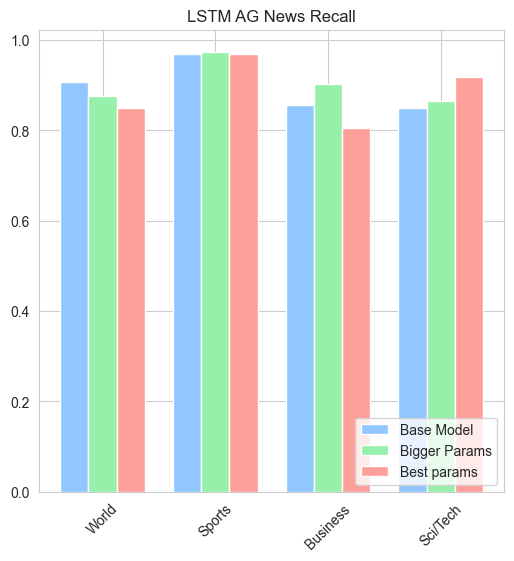

In [225]:
x = np.arange(lstm_news_best_parameters.shape[1])
width = 0.25
plt.figure(figsize=(6,6))

# plot data in grouped manner of bar type
plt.bar(x - width, lstm_news_base_model.loc['recall', :], width)
plt.bar(x , lstm_news_bigger_parameters.loc['recall', :], width)
plt.bar(x + width, lstm_news_best_parameters.loc['recall', :], width)

plt.xticks(x, lstm_news_best_parameters.columns, rotation=45)
plt.title("LSTM AG News Recall")
plt.legend(['Base Model', 'Bigger Params', 'Best params'], loc='lower right')
plt.show()

Other plots:
* same plots for BERT
* Precision, F1 score instead of recall..